# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [52]:
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import numpy as np
import torch
import math

Definisco i metodi per creare la piramide con le diverse ottave

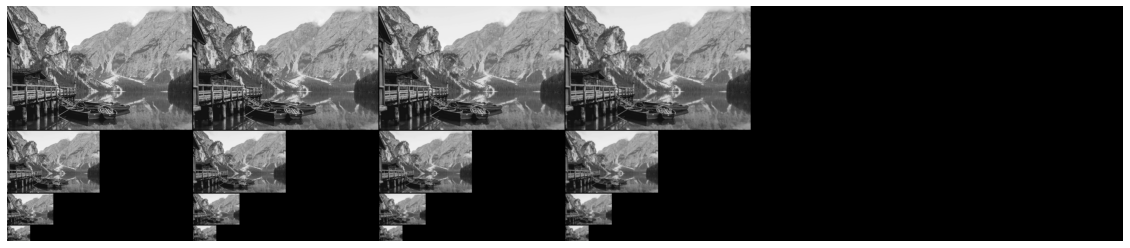

In [48]:
def generate_octave(im, s, sigma): 
    octave = [im] #prima scala dell'immagine
    k = 2**(1/s) 
    for i in range(s): 
        next_level = ndimage.gaussian_filter(octave[-1],pow(k,i) * sigma) 
        #prossima scala si moltiplica sigma * k elevato ad i, cosicchè passiamo da sigma a 2 sigma
        octave.append(next_level) #appendiamo la scala attuale
    return octave

def generate_gaussian_pyramid(im, num_octave, s, sigma): 
    p = []  
    for _ in range(num_octave): #definisco il numero di livelli della piramide
        octave = generate_octave(im, s, sigma) #genero l'ottava per quel livello
        p.append(octave) #appendo l'ottava alla lista
        im = octave[-1][::2, ::2]  #la prima scala dell'ottava successivo corrisponde alla terzultima scala
                                  # del livello attuale
    return p

def plot_pyramid(p,sz,hspace=10,vspace=10): #metodo per plottare l'imagine
    rows, cols = sz[0],sz[1]

    nrows = sum([x[0].shape[0] for x in p]) +  vspace*(num_octave-1)
    ncols = cols*(s+3)+hspace*(s+2)
    output_image = np.ones((nrows,ncols))

    r = 0
    for i in range(len(p)):
        c = 0
        for j in range(len(p[i])):
            w,h = p[i][j].shape
            output_image[r:r+w,c:c+h] = p[i][j]
            c += cols + hspace
        r += w + vspace
    
    return output_image

image = cv2.imread('figure1.jpg')
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

num_octave = 4 #4 livelli della piramide
s = 3 
sigma = 1

p = generate_gaussian_pyramid(image_rgb,num_octave,s,sigma)

output_pyr = plot_pyramid(p,image.shape)

fig = plt.figure(figsize=(20, 20))

plt.imshow(output_pyr,cmap="gray")
plt.axis('off')
plt.show()

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^5 + \exp(b^2) * \cos (c)} {3e * d}
$

*non sono necessarie librerie esterne*

In [89]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

z1 = torch.cos(c)
z2 = torch.pow(a,5)
z3_1 = torch.pow(b,2)
z3 = torch.exp(z3_1)
den = e*d*3
num = z1+z2+z3

y = torch.div(num,den)
o = torch.sum(y)


a.retain_grad()
b.retain_grad()
c.retain_grad()
d.retain_grad()
e.retain_grad()
o.retain_grad()


In [90]:
o.backward()

In [126]:
print('GRADIENTE:')
print(f'grad a rispetto ad y: {a.grad}')
print(f'grad b rispetto ad y: {b.grad}')
print(f'grad c rispetto ad y: {c.grad}')
print(f'grad d rispetto ad y: {d.grad}')
print(f'grad e rispetto ad y: {e.grad}')
print(f'grad y rispetto ad y: {o.grad}')

GRADIENTE:
grad a rispetto ad y: tensor([[1.0417e+02, 1.8000e+02],
        [1.3339e+03, 8.5333e+02],
        [5.5556e-01, 2.6667e+01]])
grad b rispetto ad y: tensor([[1.6206e+03, 1.3505e+03],
        [0.0000e+00, 2.2652e-01],
        [5.7483e+15, 7.2798e+01]])
grad c rispetto ad y: tensor([[-0.0280,  0.0266],
        [-0.0000, -0.0274],
        [ 0.0841, -0.0470]])
grad d rispetto ad y: tensor([[-1.8714e+02, -7.3516e+01],
        [-6.2256e+02, -1.7068e+02],
        [-1.5968e+14, -2.8536e+01]])
grad e rispetto ad y: tensor([[-7.4857e+01, -2.2055e+02],
        [-1.8677e+03, -1.3655e+03],
        [-4.7903e+14, -2.8536e+01]])
grad y rispetto ad y: 1.0


# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

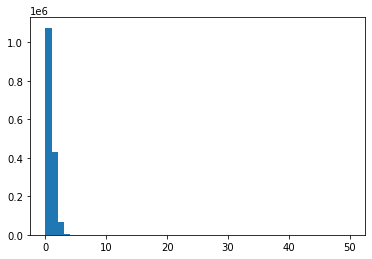

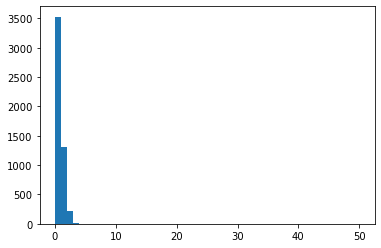

In [241]:
m = nn.BatchNorm2d(100)

x1 = torch.randn(20, 100, 35, 45)
x2 = torch.randn(1, 100, 10, 10)

y1 = m(x1)

y2 = m(x2)

array = x1.numpy()
array2 = x2.numpy()
plt.hist(array.ravel(),50,[0,50]) 
plt.show()

plt.hist(array2.ravel(),50,[0,50]) 
plt.show()


Il primo batch assume valori molto bassi, mentre invece il secondo supera come valori il 3500.

# Esercizio 4

Dato il seguente frammento di codice

In [121]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

In [122]:
img = cv2.resize(image,(400,400))
array = img.reshape(-1, 400,400)
x = torch.from_numpy(array).float()
x_f = torch.unsqueeze(x,0)
x_f.shape
y = model(x_f)
y.shape

torch.Size([1, 30, 66, 50])

La dimensione dell'output viene così utilizzando la formula per il calcolo:

conv1 =

1.1) 400(input) - 3(kernel size) +2(padding) = 399

1.2) 399 /2 (stride) = 199 

1.3) 199 + 1 = 200

conv2 =

2.1) (200,200) - (3,5) + (0,2) = (197,197)

2.2) (197,197) / 2 = (65,49)

2.3) (65,49) + (1,1) = (66,50)

# Esercizio 5

Adattare/semplificare la rete AlexNet affinché gestisca un input di immagini 400x400

In [174]:
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F

class LRN(nn.Module):
    def __init__(self, local_size=1, alpha=1.0, beta=0.75, ACROSS_CHANNELS=False):
        super(LRN, self).__init__()
        self.ACROSS_CHANNELS = ACROSS_CHANNELS
        if self.ACROSS_CHANNELS:
            self.average=nn.AvgPool3d(kernel_size=(local_size, 1, 1), 
                    stride=1,
                    padding=(int((local_size-1.0)/2), 0, 0)) 
        else:
            self.average=nn.AvgPool2d(kernel_size=local_size,
                    stride=1,
                    padding=int((local_size-1.0)/2))
        self.alpha = alpha
        self.beta = beta
    
    
    def forward(self, x):
        if self.ACROSS_CHANNELS:
            div = x.pow(2).unsqueeze(1)
            div = self.average(div).squeeze(1)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        else:
            div = x.pow(2)
            div = self.average(div)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        x = x.div(div)
        return x

class AlexNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, groups=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, padding=1, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.layer6 = nn.Sequential(
            nn.Linear(in_features=11*11*256, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        self.layer7 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        
        self.layer8 = nn.Linear(in_features=4096, out_features=num_classes)
        
    def forward(self, x):
        out = F.interpolate(x, size=400)
        x = self.layer5(self.layer4(self.layer3(self.layer2(self.layer1(out)))))
        
        print(x.size())
        x = x.view(-1, 11*11*256)
        x = self.layer8(self.layer7(self.layer6(x)))
        
        return x

In [175]:
model= AlexNet()

Le operazioni eseguite sono le seguenti:

1.1) indipendentemente dall'immagine che arriva in input, viene eseguita un'interpolazione per 
    transformare l'immagine in dimensione 400x400
    
1.2) il primo livello fully connected quindi avrà dei filtri con una dimensione più elevata che, eseguendo i calcoli, escono 11x11. Quindi modifichiamo l'input di quel livello

# Esercizio 6

Data la seguente immagine, costruire due Bounding box con IoU = 0.5. 
Descrivere tutte le operazioni effettuate

![](figure2.jpg)

In [224]:
image2 = cv2.imread('figure2.jpg')
image_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

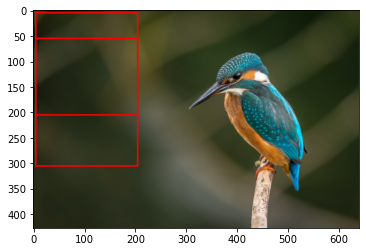

In [225]:
start_point = (5, 5)
end_point = (205, 205)

start_point2 = (5, 55)
end_point2 = (205, 305)
  
color = (255, 0, 0)
thickness = 2

image_rgb = cv2.rectangle(image_rgb, start_point, end_point, color, 2)
image_rgb = cv2.rectangle(image_rgb,start_point2,end_point2,color,2)
plt.imshow(image_rgb)

In [227]:
#definisco i valori dei box precedenti

xa1 = 5
ya1 = 5

xa2 = 205
ya2 = 205

xb1 = 5
yb1 = 55

xb2 = 205
yb2 = 305

inter_x1 = max(xb1, xa1)
inter_y1 = max(yb1, ya1)
inter_x2 = min(xb2, xa2)
inter_y2 = min(yb2, ya2)

#definisco le area del primo quadrato e del secondo quadrato

anchor_area = (ya2 - ya1) * (xa2 - xa1)
box_area = (yb2 - yb1) * (xb2 - xb1)

#calcolo l'area di intersezione tra i due quadrati

iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)

#per calcolare l'intersection over union devo dividere l'area di intersezione per l'unione 
#(le aree dei 2 quadrati a cui si sottrae l'area di interesezione)
iou = iter_area / (anchor_area + box_area - iter_area)

iou

0.5